In [2]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [4]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [19]:
x_train=x_train/255
x_test=x_test/255

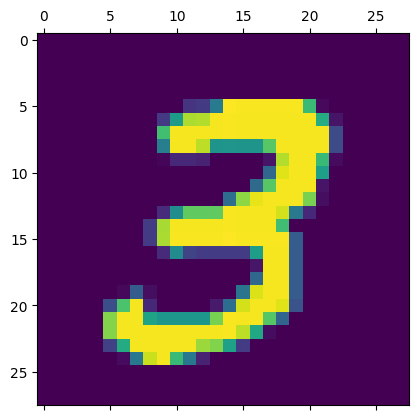

In [20]:
plt.matshow(x_train[7])

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
y_train.shape

(60000,)

In [23]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [25]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
              )

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 459us/step - loss: 0.4715 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 1s 475us/step - loss: 0.3045 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 1s 460us/step - loss: 0.2837 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 449us/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 465us/step - loss: 0.2669 - accuracy: 0.9252


In [26]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 404us/step - loss: 0.2683 - accuracy: 0.9258


[0.26834237575531006, 0.9258000254631042]

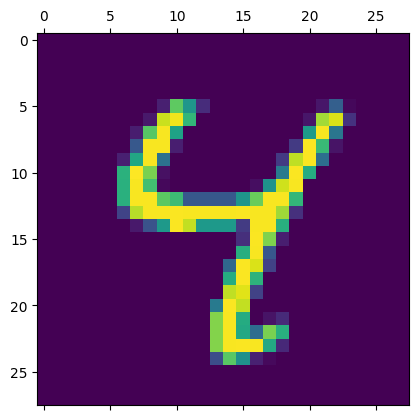

In [31]:
plt.matshow(x_test[6])

In [43]:
predictions=model.predict(x_test_flatten)

313/313 [==============================] - 0s 393us/step


In [44]:
np.argmax(predictions[6])

4

In [45]:
y_pred=[np.argmax(i) for i in predictions ]

In [46]:
conf_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(95.72222222222221, 0.5, 'Truth')

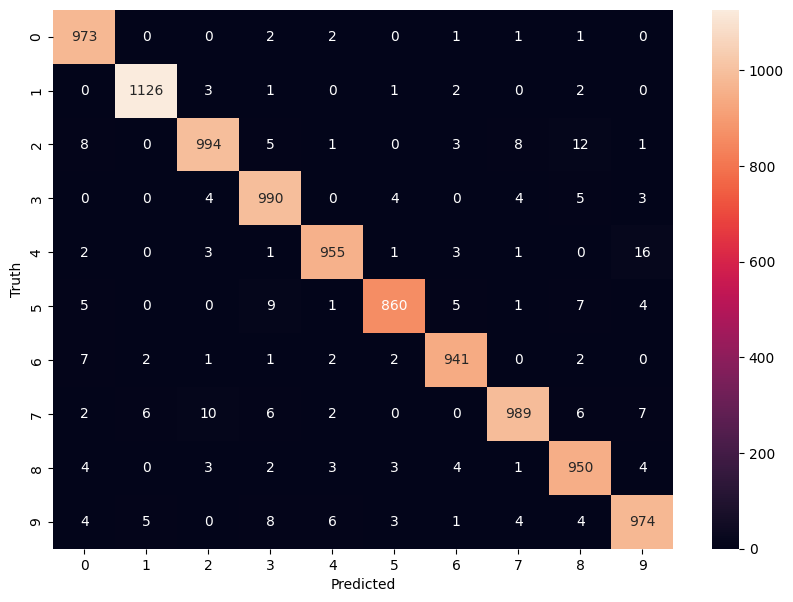

In [47]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap (conf_mat, annot=True, fmt='d') 
plt.xlabel('Predicted') 
plt.ylabel ('Truth')

In [38]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
              )

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 711us/step - loss: 0.2716 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 1s 794us/step - loss: 0.1214 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0847 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.0651 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 2s 974us/step - loss: 0.0523 - accuracy: 0.9840


In [39]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 475us/step - loss: 0.0795 - accuracy: 0.9752


[0.07950350642204285, 0.9751999974250793]